In [1]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [2]:
##  DeepFace je open-source knihovna pro rozpoznávání obličejů pomocí hlubokého učení. Umožňuje snadné použití předtrénovaných modelů pro analýzu tváří, včetně.
## Odhad pohlaví a věku, Rozpoznání obličeje (identifikace osoby), Analýza emocí (šťastný, smutný, naštvaný atd.)

In [3]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace
import os

Krok číslo 1.
 - definice cesty k adresáří s emocemi path =
 C:\Users\zitao\Documents\PETR\DATA SCIENCE\EMOCE\train

 - definice cesty k adresáři s konkrétními emocemi

 - definice cesty ke kontrétnimu souboru/fotce
 - pokud výsledek analýzy emoce z fotky nebude odpovídat názvu složky "emoce" zapiš název souboru, který právě zkoumáne, zapiš do seznamu nevhodných souborů ( fotku, kterou nechceme)
 - Opakuj pro každý soubor v dané složce -->

## Zobrazení obrázku z cesty adresáře

In [5]:
path = r"C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE"

In [6]:
fotky_emoce = os.listdir(f"{path}/train")
fotky_emoce

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
for i in range (0,len(fotky_emoce)): 
    nazev_slozky = fotky_emoce [i]
    ## seznam_souboru = os.listdir(f"{path}/train/{nazev_slozky}")
    cesta_k_emocim = (f"{path}/train/{nazev_slozky}")
    print(cesta_k_emocim, nazev_slozky)

C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/angry angry
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/disgust disgust
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/fear fear
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/happy happy
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/neutral neutral
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/sad sad
C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/surprise surprise


## Analýza obrázku

In [10]:
## definice seznamu obrázků
seznam_obrazku = []
počet = 0
obrazek_analyza = ""

In [12]:
obrazek_analyza = cv2.imread(f"{cesta_k_emocim}/Training_50998630.jpg") # načítam obrazek

TypeError: Image data of dtype object cannot be converted to float

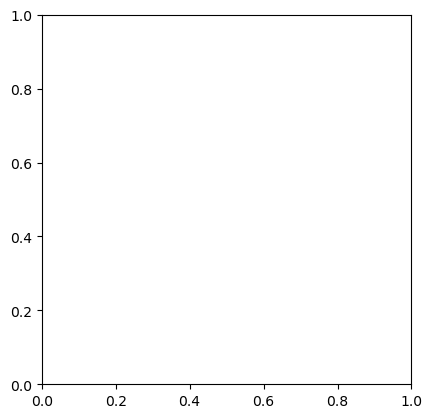

In [13]:
plt.imshow(obrazek_analyza)

In [ ]:
prediction_analyza = DeepFace.analyze(obrazek_analyza, enforce_detection=False)   ##  FALSE  říká DeepFace, jak má reagovat, pokud na obrázku nenajde obličej.

In [ ]:
prediction_analyza

In [ ]:
emoce =  prediction_analyza[0]['dominant_emotion'], prediction_analyza[0]['dominant_race'], prediction_analyza[0]['dominant_gender']
emoce

In [ ]:
plt.imshow(obrazek_analyza)

In [14]:
seznam_fotek_NOK = []
seznam_fotek_OK = []
chybny_soubor = []

In [15]:
# for obrazek1 in os.listdir(cesta_angry):  
#     cesta_obrazku = os.path.join(cesta_angry, obrazek1)  
#     obrazek2 = cv2.imread(cesta_obrazku)  

#     if obrazek2 is None:
#         print(f"Chyba: Obrázek {obrazek1} se nepodařilo načíst.")
#         chybny_soubor.append(obrazek1)  # Uložit název souboru, ne None
#         continue  

#     try:
#         prediction = DeepFace.analyze(obrazek2, actions=['emotion'], enforce_detection=False)
#         emoce = prediction[0]['dominant_emotion']

#         if emoce == 'angry':
#             seznam_fotek_OK.append(cesta_obrazku)
#         else:
#             seznam_fotek_NOK.append(cesta_obrazku)

#     except ValueError as e:
#         ## print(f"Chyba: DeepFace nemohl analyzovat {cesta_obrazku} – {e}")
#         chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor
#     except Exception as e:
#        ## print(f"Neočekávaná chyba u {cesta_obrazku}: {e}")
#         chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor


In [ ]:
## len(seznam_fotek_OK)   ## zobrazí všechny fotky, které vyjadřují "nahněvanou"  emoci

In [ ]:
## print(seznam_fotek_OK)

In [ ]:
## len(seznam_fotek_NOK)

In [ ]:
## print(seznam_fotek_NOK)

In [ ]:
## len(chybny_soubor)

In [ ]:
## print(chybny_soubor)

In [16]:
for i in range (0,len(fotky_emoce)-5): 
    nazev_slozky = fotky_emoce [i]
    ## seznam_souboru = os.listdir(f"{path}/train/{nazev_slozky}")
    cesta_k_emocim = (f"{path}/train/{nazev_slozky}")
    for obrazek1 in os.listdir(cesta_k_emocim):  
        cesta_obrazku = os.path.join(cesta_k_emocim, obrazek1)  
        obrazek2 = cv2.imread(cesta_obrazku)  
    
        if obrazek2 is None:
            ## print(f"Chyba: Obrázek {obrazek1} se nepodařilo načíst.")
            chybny_soubor.append(obrazek1)  # Uložit název souboru, ne None
            continue  
    
        try:
            prediction = DeepFace.analyze(obrazek2, actions=['emotion'], enforce_detection=False)
            emoce = prediction[0]['dominant_emotion']
    
            if emoce == (nazev_slozky):
                seznam_fotek_OK.append(cesta_obrazku)
            else:
                seznam_fotek_NOK.append(cesta_obrazku)
    
        except ValueError as e:
            ## print(f"Chyba: DeepFace nemohl analyzovat {cesta_obrazku} – {e}")
            chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor
        except Exception as e:
           ## print(f"Neočekávaná chyba u {cesta_obrazku}: {e}")
            chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor

In [17]:
len(seznam_fotek_OK)   ## zobrazí všechny fotky, které vyjadřují "nahněvanou"  emoci

3013

In [18]:
len(seznam_fotek_NOK)

1417

In [19]:
len(chybny_soubor)

0

In [20]:
[soubor for soubor in seznam_fotek_OK if soubor == "Training_63156802.jpg"]

[]

In [ ]:
##print(seznam_fotek_NOK)

In [ ]:
## chybny_soubor

In [ ]:
obrazek1

In [ ]:
cesta_obrazku

In [ ]:
print(emoce)

In [ ]:
cesta_angry

In [ ]:
emoce = prediction[0]['dominant_emotion'],prediction[0]['dominant_race'],prediction[0]['dominant_gender']
emoce

In [ ]:
plt.imshow(obrazek)

## Výsledky analýzy

In [ ]:
prediction

##  Určení emocí z obrázku

In [ ]:
predictions = [{prediction[0]['dominant_emotion'],prediction[0]['dominant_gender'],prediction[0]['dominant_race']}]

In [ ]:
predictions

In [ ]:
oblicej = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
usmev = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
bryle = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cernobily = cv2.cvtColor(obrazek, cv2.COLOR_BGR2GRAY)

## Vyhledavaní obličeje na obrázku a označení čtvercem

# Zobrazení obrázku v černobílém formátu

In [ ]:
plt.imshow(cernobily, cmap='gray')

## Vyhledavame obličej a oramujeme

In [ ]:
face = oblicej.detectMultiScale(cernobily, 1.1, 4)

# scaleFactor=1.3: Určuje, jak moc se velikost obrázku zmenšuje při každém kroku. Nižší hodnota znamená přesnější, ale pomalejší detekci.
# minNeighbors=6: Kolik překrytí musí mít detekce, aby byl výsledek považován za platný. Vyšší číslo = méně falešných poplachů, ale může vynechat slabě detekované obličeje.

# Kreslime rameček kolem tváře
for (x, y, w, h) in face:
    cv2.rectangle(obrazek, (x, y), (x+w, y+h), (255, 0, 0), 2)

# # Kreslime rameček kolem usměvu
oblast_obliceje = cernobily[y:y+h, x:x+w]
## usmevy = usmev.detectMultiScale(oblast_obliceje, scaleFactor=1.2, minNeighbors=6)
smile = usmev.detectMultiScale(oblast_obliceje, 1.8, 8)

for (sx, sy, sw, sh) in smile:
    cv2.rectangle(obrazek, (x+sx, y+sy), (x+sx+sw, y+sy+sh), (0, 255, 0), 2)

# ## Kreslime rameček kolem brylí
glasses = bryle.detectMultiScale(oblast_obliceje, 1.1, 4)
for (sgx, sgy, sgw, sgh) in glasses:
   cv2.rectangle(obrazek, (x+sgx, y+sgy), (x+sgx+sgw, y+sgy+sgh), (0, 0, 255), 2)



In [ ]:
plt.imshow(obrazek)

## Nadpis emoce

In [ ]:
obrazek.shape[2]

In [ ]:
font = cv2.FONT_ITALIC
cv2.putText(obrazek, prediction[0]['dominant_emotion'], (obrazek.shape[1] - 250, 25), font, 1, (255, 0, 0), 2, cv2.LINE_4)
plt.imshow(obrazek)